**MICROSOFT FILM INVESTMENT ANALYSIS**

**Author: Nduta Karanja**





**Introduction**

**Business Problem and understanding**


Microsoft sees all the big companies creating original video content and they want  to create a new movie studio and achieve by exploring what types of films are currently doing the best at the box office.

To assist on this,i will consider;
* Top ten most produced genres over the recording period
* Success rate in terms of return on investments on the genres,domestic and foreign region performance for marketing  and resource allocation purposes and audience rating to gauge market behaviour.
*  Studios involved in the most successful genres for the purpose of possible bench marking in regards to successful production and marketing structures,production budget maximisation,star power,seasonal trends and proper competition understanding.


 **DATA**

At my disposal,i have been provided for data sorces to analyse movie data.The likes of https://www.imdb.com/,https://www.rottentomatoes.com/ ,https://www.themoviedb.org/, https://www.the-numbers.com/ and https://www.boxofficemojo.com/ to create actionable insight that Microsoft can use to start a film studio.

The data for this analysis have come from Databases:
*  IMDb (movie title, release year, genres, and audience rating)
*  The Movie Database (movie title,popularity, audience rating)
*  Box Office Mojo (movie title, gross earnings,Studios)
*  The Number (release dates,gross earnings,production budget)


In [132]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#DATA PREPARATION

**Product Data Preparation**

In [133]:

#importing data from IMDb
imdb_basics = pd.read_csv('/content/title.basics.csv')
imdb_ratings = pd.read_csv('/content/title.ratings.csv')

#merging IMDb files into a single database
imdb_data = imdb_basics.join(imdb_ratings.set_index('tconst'),
                                   how = 'inner', on = 'tconst', rsuffix = 'r')


#change column name 'primary title' to 'title' to match our additional files
imdb_data.rename(columns = {'primary_title':'title'}, inplace = True)

imdb_data


,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
146129,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [134]:
#checking IMDb data shape
imdb_data.shape

(73856, 8)

In [135]:
# Importing data from The Movie Database
tmdb_data = pd.read_csv('/content/tmdb.movies.csv')
tmdb_data.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [136]:
#checking The Movie Data shape
tmdb_data.shape

(26517, 10)

In [137]:
#merging IMDb database with The Movie database
movie_production_db = imdb_data.join(tmdb_data.set_index('title'),
                                   how = 'inner', on = 'title', rsuffix = 'r')
movie_production_db.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0,genre_ids,id,original_language,original_titler,popularity,release_date,vote_average,vote_count
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,24185,"[35, 18]",299782,en,The Other Side of the Wind,9.800,2018-11-02,7.0,64
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32,5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,2.9,26
78425,tt4503112,Bigfoot,Bigfoot,2018,NaN,"Action,Horror",4.6,9,5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,2.9,26
141086,tt9181914,Bigfoot,Bigfoot,2018,86.0,"Animation,Family",2.5,55,5872,"[27, 878, 12]",117856,en,Bigfoot,2.813,2012-06-30,2.9,26
17,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,26332,[18],567662,en,Heaven & Hell,0.600,2018-11-06,7.5,2


In [138]:
#checking movie production database shape
movie_production_db.shape

(19949, 17)


**Financial Data Preparation**

In [139]:
#importing data from Box Office - gross returns and the studios involved
movies_gross = pd.read_csv('/content/bom.movie_gross.csv')
movies_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [140]:
#checking the gross return data shape
movies_gross.shape

(3387, 5)

In [141]:
#Importing data from The Numbers database - production budget against worldwide gross
movies_budget = pd.read_csv('/content/tn.movie_budgets.csv')

#change column name 'movie' to 'title' to match our additional files
movies_budget.rename(columns = {'movie':'title'}, inplace = True)

# converting budgets dataset to string to be able to calculate profits
movies_budget['worldwide_gross'] = movies_budget['worldwide_gross'].astype(str)
movies_budget['domestic_gross'] = movies_budget['domestic_gross'].astype(str)
movies_budget['production_budget'] = movies_budget['production_budget'].astype(str)

# removing the Dollar Sign to make the columns floats
movies_budget['production_budget'] = movies_budget['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
movies_budget['worldwide_gross'] = movies_budget['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movies_budget['domestic_gross'] = movies_budget['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# calculating the profits
movies_budget['Profit'] = movies_budget['worldwide_gross'] - movies_budget['production_budget']

movies_budget.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,Profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [142]:
movies_budget.shape

(5782, 7)

In [143]:
#concatenating the movies gross and movies budget
financial_analysis_data = pd.concat([movies_gross,movies_budget])
financial_analysis_data.head()

,title,studio,domestic_gross,foreign_gross,year,id,release_date,production_budget,worldwide_gross,Profit
0,Toy Story 3,BV,415000000.0,652000000,2010.0,NaN,NaN,NaN,NaN,NaN
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010.0,NaN,NaN,NaN,NaN,NaN
4,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,NaN,NaN,NaN,NaN,NaN


In [144]:
#checking financial data shape
financial_analysis_data.shape

(9169, 10)

**The Big Merge!**


In [145]:
#merging our production data to our financial analysis data
integrated_db = movie_production_db.join(financial_analysis_data.set_index('title'),
                                   how = 'inner', on = 'title', rsuffix = 'r')
integrated_db.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0,genre_ids,...,vote_count,studio,domestic_gross,foreign_gross,year,idr,release_dater,production_budget,worldwide_gross,Profit
20,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,8456,"[16, 28, 35, 10751]",...,46,NaN,0.0,NaN,NaN,26.0,"Dec 31, 2012",45000000.0,73706.0,-44926294.0
38,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,18152,"[53, 28, 80, 18, 9648]",...,63,Relbig.,1100000.0,NaN,2016.0,NaN,NaN,NaN,NaN,NaN
40,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,7.5,24,14596,"[9648, 35]",...,200,NaN,1109808.0,NaN,NaN,21.0,"Jun 19, 2015",200000.0,1165996.0,965996.0
67603,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,14596,"[9648, 35]",...,200,NaN,1109808.0,NaN,NaN,21.0,"Jun 19, 2015",200000.0,1165996.0,965996.0
48,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,5350,"[12, 18]",...,518,IFC,744000.0,8000000,2012.0,NaN,NaN,NaN,NaN,NaN


In [146]:
#checking our integrated database shape
integrated_db.shape

(6658, 26)

**DATA CLEANING**

# **DATA CLEANING**

In [160]:
#Checking for missing values
integrated_db.isna().sum()

tconst                0
title                 0
original_title        0
start_year            0
runtime_minutes       0
genres               21
averagerating         0
numvotes              0
Unnamed: 0            0
genre_ids             0
id                    0
original_language     0
original_titler       0
popularity            0
release_date          0
vote_average          0
vote_count            0
studio                0
domestic_gross        0
foreign_gross         0
year                  0
idr                   0
release_dater         0
production_budget     0
worldwide_gross       0
Profit                0
Release Year          0
dtype: int64

**Dropping and Filling Missing  Values**

In [148]:
integrated_db.runtime_minutes.fillna(integrated_db.runtime_minutes.mean(),inplace=True)
integrated_db.domestic_gross.fillna(integrated_db.domestic_gross.mean(),inplace=True)
###
# Convert 'foreign_gross' column to numeric
integrated_db['foreign_gross'] = pd.to_numeric(integrated_db['foreign_gross'], errors='coerce')
integrated_db.foreign_gross.fillna(integrated_db.foreign_gross.mean(),inplace=True)
###
integrated_db.production_budget.fillna(integrated_db.production_budget.mean(),inplace=True)
integrated_db.idr.fillna(integrated_db.idr.mean(),inplace=True)

integrated_db.worldwide_gross.fillna(integrated_db.worldwide_gross.mean(),inplace=True)
integrated_db.Profit.fillna(integrated_db.Profit.mean(),inplace=True)

integrated_db['studio'].fillna('Unknown_studio', inplace=True)



In [149]:
#since we will focus more on genres,to get a clean output,we will drop the unknown genres
# Filter out rows with unknown genres
integrated_db = integrated_db[integrated_db['genres'] != 'Unknown_genres'].copy()

# Reset index after filtering
integrated_db.reset_index(drop=True, inplace=True)
###

integrated_db['year'].dropna(inplace=True)
# finding the mode of the column 'year'
mode_1=integrated_db['year'].mode()[0]
mode_1
# replacing null values with mode_1 value
integrated_db['year'].fillna(mode_1, inplace=True)
###

integrated_db['start_year'].dropna(inplace=True)
# replacing null values with mode_1 value
integrated_db['start_year'].fillna(mode_1, inplace=True)
###

integrated_db['release_dater'].dropna(inplace=True)
# finding the mode of the column 'year'
mode_1=integrated_db['release_dater'].mode()[0]
mode_1
# replacing null values with mode_1 value
integrated_db['release_dater'].fillna(mode_1, inplace=True)
############

integrated_db.drop(['original_titler'], axis=1)

integrated_db

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Unnamed: 0,genre_ids,...,vote_count,studio,domestic_gross,foreign_gross,year,idr,release_dater,production_budget,worldwide_gross,Profit
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,8456,"[16, 28, 35, 10751]",...,46,Unknown_studio,0.0,8.284734e+07,2015.0,26.000000,"Dec 31, 2012",4.500000e+07,7.370600e+04,-4.492629e+07
1,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,18152,"[53, 28, 80, 18, 9648]",...,63,Relbig.,1100000.0,8.284734e+07,2016.0,51.685808,"Mar 27, 2015",3.534103e+07,1.098122e+08,7.447116e+07
2,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,7.5,24,14596,"[9648, 35]",...,200,Unknown_studio,1109808.0,8.284734e+07,2015.0,21.000000,"Jun 19, 2015",2.000000e+05,1.165996e+06,9.659960e+05
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,14596,"[9648, 35]",...,200,Unknown_studio,1109808.0,8.284734e+07,2015.0,21.000000,"Jun 19, 2015",2.000000e+05,1.165996e+06,9.659960e+05
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,5350,"[12, 18]",...,518,IFC,744000.0,8.000000e+06,2012.0,51.685808,"Mar 27, 2015",3.534103e+07,1.098122e+08,7.447116e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6653,tt8267604,Capernaum,Capharnaüm,2018,126.0,Drama,8.5,20215,23899,[18],...,329,SPC,1700000.0,8.284734e+07,2018.0,51.685808,"Mar 27, 2015",3.534103e+07,1.098122e+08,7.447116e+07
6654,tt8290698,The Spy Gone North,Gongjak,2018,137.0,Drama,7.2,1620,24471,"[18, 36]",...,33,CJ,501000.0,8.284734e+07,2018.0,51.685808,"Mar 27, 2015",3.534103e+07,1.098122e+08,7.447116e+07
6655,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,24465,"[35, 10749, 18, 9648]",...,11,WGUSA,747000.0,8.210000e+07,2018.0,51.685808,"Mar 27, 2015",3.534103e+07,1.098122e+08,7.447116e+07
6656,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628,24172,[99],...,142,Unknown_studio,6352306.0,8.284734e+07,2015.0,29.000000,"Sep 21, 2018",5.000000e+06,6.653715e+06,1.653715e+06


In [150]:
#checking integrated database shape after cleaning
integrated_db.shape

(6658, 26)

In [151]:
# checking the info on df DataFrame
integrated_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6658 entries, 0 to 6657
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             6658 non-null   object 
 1   title              6658 non-null   object 
 2   original_title     6658 non-null   object 
 3   start_year         6658 non-null   int64  
 4   runtime_minutes    6658 non-null   float64
 5   genres             6637 non-null   object 
 6   averagerating      6658 non-null   float64
 7   numvotes           6658 non-null   int64  
 8   Unnamed: 0         6658 non-null   int64  
 9   genre_ids          6658 non-null   object 
 10  id                 6658 non-null   int64  
 11  original_language  6658 non-null   object 
 12  original_titler    6658 non-null   object 
 13  popularity         6658 non-null   float64
 14  release_date       6658 non-null   object 
 15  vote_average       6658 non-null   float64
 16  vote_count         6658 

# **DATA EXPLORATION AND VISUALIZATION**

To begin,let us see the genres that has the highest rate of production over the period that the data was recorded.We will focus on the top 10 as an overview of the top productions.
The distribution difference could hint a couple of things regarding the market behavior towards these genres hence the consistency in production by the studios.

Afterwards, we will test the sustainability of the top genres by profitablity (Return on investment) and average rating (consumer behavior and preference).

This is to conclude on recomending to Microsoft as to where their first financial year on film studio investment should begin for the best results in both profits and market behavior by average rating.

In [152]:
# finding the top 10 genres in terms of production data numbers
top_10_genres = pd.DataFrame(integrated_db['genres'].value_counts().head(10))
top_10_genres

,count
genres,
Drama,753
Documentary,235
"Comedy,Drama",231
"Drama,Romance",217
"Comedy,Drama,Romance",214
Comedy,201
"Adventure,Animation,Comedy",179
"Drama,Thriller",143
"Comedy,Romance",135


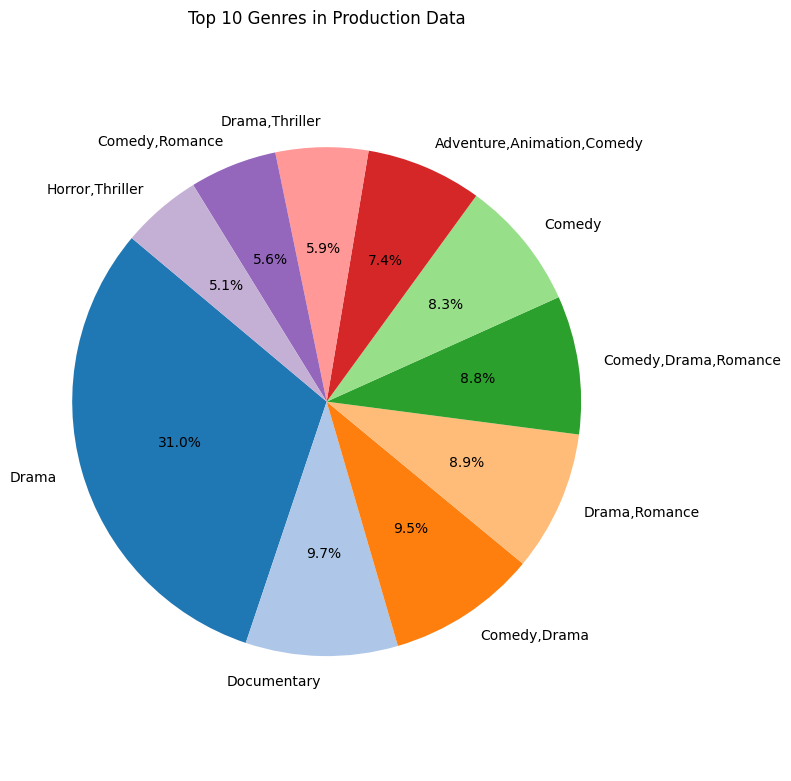

In [153]:
#Visualise the above observation
genres = top_10_genres.index
count = top_10_genres['count']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(count, labels=genres, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Top 10 Genres in Production Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

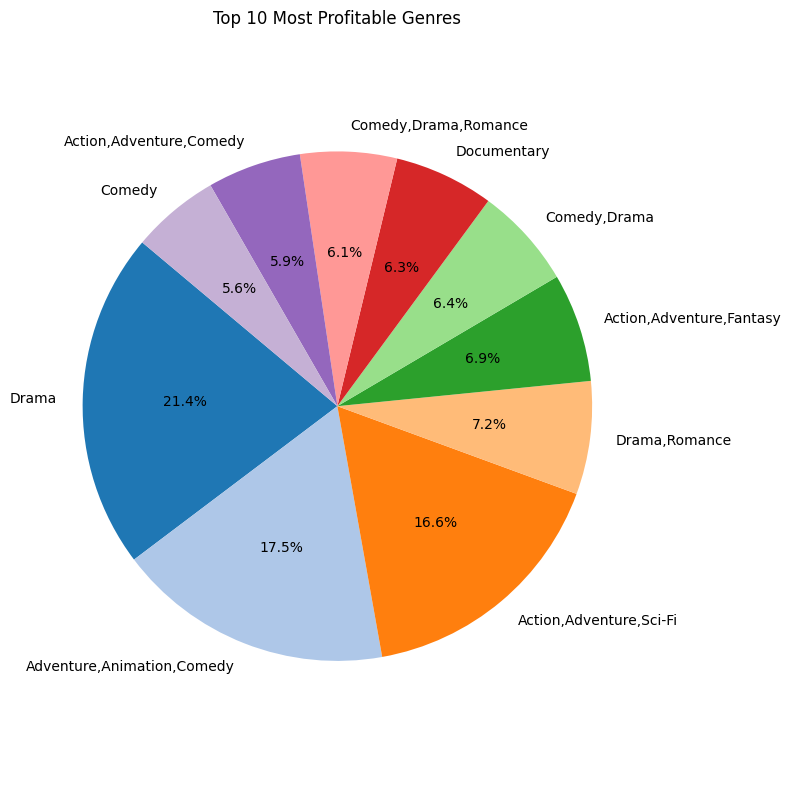

In [154]:
# Calculate total profit for each genre
genre_profit = integrated_db.groupby('genres')['Profit'].sum().sort_values(ascending=False)

# Select top 10 most profitable genres
top_10_profitable_genres = genre_profit.head(10)

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(top_10_profitable_genres, labels=top_10_profitable_genres.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Top 10 Most Profitable Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

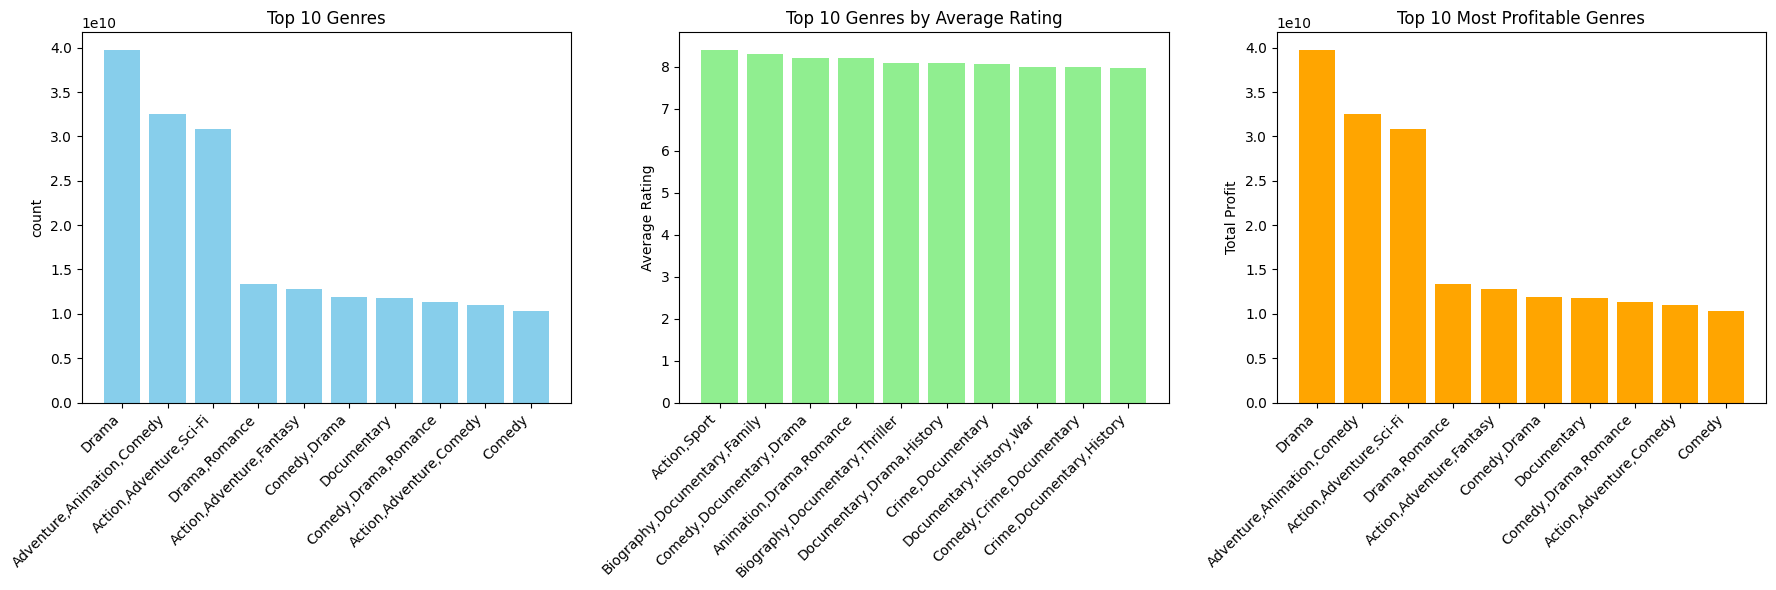

In [155]:
# Calculate total profit for each genre
genre_profit = integrated_db.groupby('genres')['Profit'].sum().sort_values(ascending=False)

# Calculate average rating for each genre
genre_avg_rating = integrated_db.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

# Select top 10 most profitable genres
top_10_profitable_genres = genre_profit.head(10)

# Select top 10 genres by average rating
top_10_rating_genres = genre_avg_rating.head(10)

# Plotting
plt.figure(figsize=(18, 6))

# Plot top 10 genres
plt.subplot(1, 3, 1)
plt.bar(top_10_profitable_genres.index, top_10_profitable_genres.values, color='skyblue')
plt.title('Top 10 Genres')
plt.ylabel('count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
plt.bar(top_10_rating_genres.index, top_10_rating_genres.values, color='lightgreen')
plt.title('Top 10 Genres by Average Rating')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')

# Plot top 10 most profitable genres
plt.subplot(1, 3, 3)
plt.bar(top_10_profitable_genres.index, top_10_profitable_genres.values, color='orange')
plt.title('Top 10 Most Profitable Genres')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

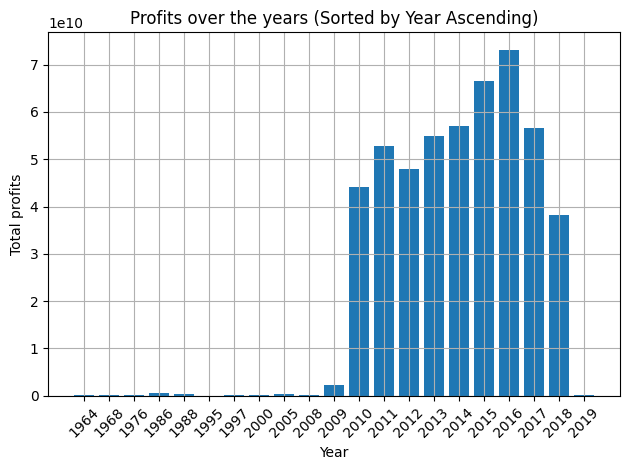

In [156]:
# plot a bar chart of trends of profits over the years
# Convert release date to datetime format and extract release year
integrated_db['Release Year'] = pd.to_datetime(integrated_db['release_date']).dt.year

# Group by year and calculate total worldwide gross
yearly_worldwide_gross = integrated_db.groupby('Release Year')['Profit'].sum()

# Sort years in ascending order
yearly_worldwide_gross_sorted = yearly_worldwide_gross.sort_index()

# Plot bar chart
plt.bar(yearly_worldwide_gross_sorted.index.astype(str), yearly_worldwide_gross_sorted.values)

# Customize plot
plt.xlabel('Year')
plt.ylabel('Total profits')
plt.title('Profits over the years (Sorted by Year Ascending)')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


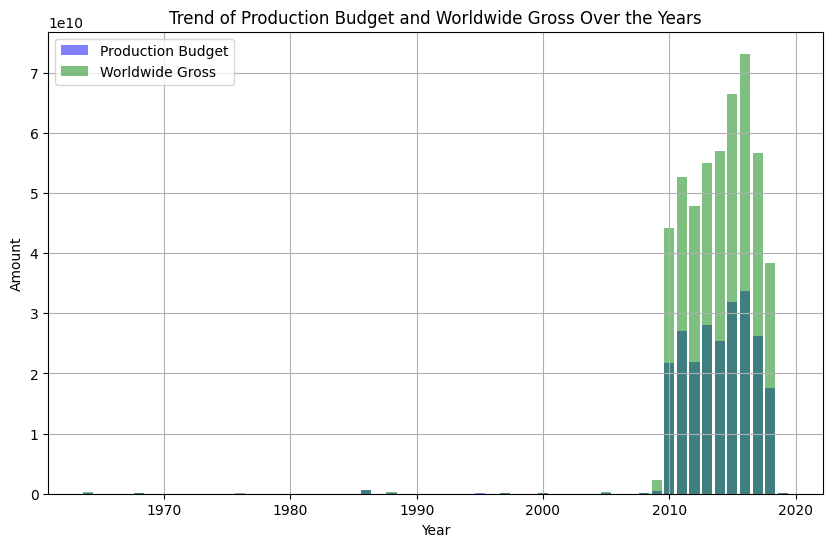

In [157]:
# plot a line plot of Trend of Production Budget Over the Years
# Convert release date to datetime format
integrated_db['release_date'] = pd.to_datetime(integrated_db['release_date'])

# Extract year from release date
integrated_db['Release Year'] = integrated_db['release_date'].dt.year

# Group by year and calculate total worldwide gross
yearly_production_budget = integrated_db.groupby('Release Year')['production_budget'].sum()

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(yearly_production_budget.index, yearly_production_budget.values, color='blue', alpha=0.5, label='Production Budget')
plt.bar(yearly_worldwide_gross.index, yearly_worldwide_gross.values, color='green', alpha=0.5, label='Worldwide Gross')
plt.title('Trend of Production Budget and Worldwide Gross Over the Years')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

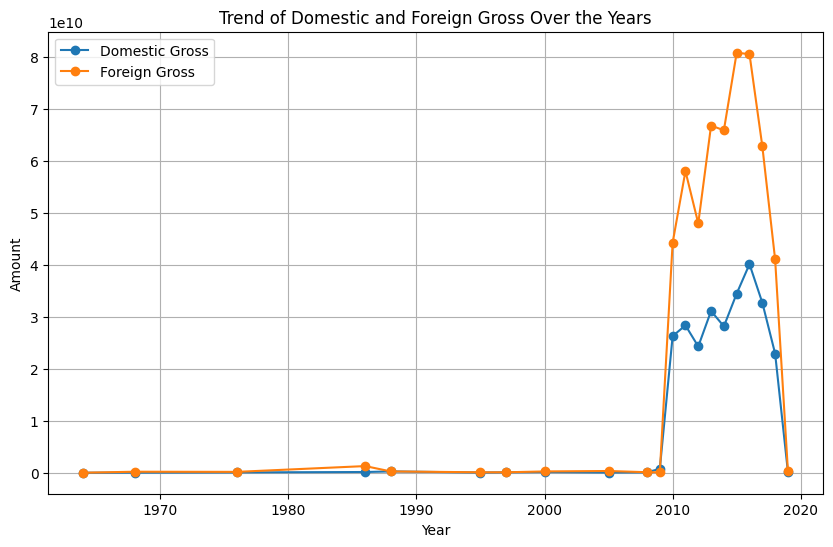

In [158]:
# Group by year and calculate total domestic and foreign gross
yearly_domestic_gross = integrated_db.groupby('Release Year')['domestic_gross'].sum()
yearly_foreign_gross = integrated_db.groupby('Release Year')['foreign_gross'].sum()

# Plot line plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_domestic_gross.index, yearly_domestic_gross.values, marker='o', linestyle='-', label='Domestic Gross')
plt.plot(yearly_foreign_gross.index, yearly_foreign_gross.values, marker='o', linestyle='-', label='Foreign Gross')
plt.title('Trend of Domestic and Foreign Gross Over the Years')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

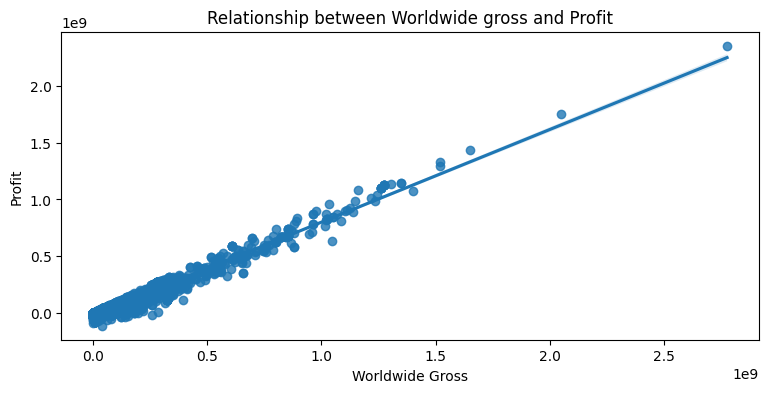

In [159]:
# Plot scatterplot showing the relationship between profit and worldwide gross
plt.figure(figsize = (9,4))
sns.regplot(x = 'worldwide_gross', y = 'Profit', data = integrated_db)
plt.title('Relationship between Worldwide gross and Profit')
plt.xlabel('Worldwide Gross')
plt.ylabel('Profit')
plt.show()